In [29]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet

In [133]:
rental = pd.read_csv('Final_rental_big.csv')

In [134]:
rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,location,24HMaintenance,24hEmergency,AirConditioning,Atm,...,hottub_ava,movieroom_ava,vistorparking_ava,heating_ava,parking_ava,garage_ava,stove_ava,smoking_ava,partyroom_ava,fancykitchen_ava
0,1864.0,1.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,1,0,0,0
1,2003.0,1.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,1,0,0,0
2,2347.0,2.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,1,0,0,0
3,2134.0,1.0,1.0,43.689224,-79.411199,Toronto,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,2475.0,2.0,1.0,43.689224,-79.411199,Toronto,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [135]:
rental.shape

(7051, 140)

In [136]:
#Min max scaler latitude and longitude
lat_scaler = MinMaxScaler()
rental['latitude'] = lat_scaler.fit_transform(rental['latitude'].values.reshape(-1, 1))

long_scaler = MinMaxScaler()
rental['longitude'] = long_scaler.fit_transform(rental['longitude'].values.reshape(-1, 1))

In [137]:
rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,location,24HMaintenance,24hEmergency,AirConditioning,Atm,...,hottub_ava,movieroom_ava,vistorparking_ava,heating_ava,parking_ava,garage_ava,stove_ava,smoking_ava,partyroom_ava,fancykitchen_ava
0,1864.0,1.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,1,0,0,0
1,2003.0,1.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,1,0,0,0
2,2347.0,2.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,1,0,0,0
3,2134.0,1.0,1.0,0.497749,0.497459,Toronto,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,2475.0,2.0,1.0,0.497749,0.497459,Toronto,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [153]:
#One hot encoding location col, concat to df and delete the original location col
enc = OneHotEncoder(handle_unknown='ignore')
matrix_fitted = enc.fit_transform(rental.location.values.reshape(-1, 1)).toarray()
matrix_colname = enc.get_feature_names(['location'])
fitted_df = pd.DataFrame(matrix_fitted, columns=matrix_colname)
final_rental = pd.concat([rental, fitted_df], sort=False, axis = 1).drop(columns=['location'])
final_rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,24HMaintenance,24hEmergency,AirConditioning,Atm,Backyard,...,location_EastYork,location_Etobicoke,location_Markham,location_Mississauga,location_NorthYork,location_Scarborough,location_Thornhill,location_Toronto,location_Vaughan,location_York
0,1864.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2003.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2347.0,2.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2134.0,1.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2475.0,2.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Engineering Attempts

In [154]:
#final_rental['bed_bath_ratio'] = final_rental.bedroom_num / final_rental.bathroom_num

In [165]:
#Change 0 bedroom studios / condos to 0.8 bedrooms
def change_studio_price(x):
    if x['bedroom_num'] == 0:
        return 0.8
    else:
        return x['bedroom_num']
    
final_rental['bedroom_num'] = final_rental.apply(lambda x: change_studio_price(x), axis = 1)

In [166]:
final_rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,24HMaintenance,24hEmergency,AirConditioning,Atm,Backyard,...,location_EastYork,location_Etobicoke,location_Markham,location_Mississauga,location_NorthYork,location_Scarborough,location_Thornhill,location_Toronto,location_Vaughan,location_York
0,1864.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2003.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2347.0,2.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2134.0,1.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2475.0,2.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [167]:
#final_rental['price'] = final_rental.price / final_rental.bedroom_num
#final_rental = final_rental.drop('price_per_bed_bath', axis = 1)

In [168]:
final_rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,24HMaintenance,24hEmergency,AirConditioning,Atm,Backyard,...,location_EastYork,location_Etobicoke,location_Markham,location_Mississauga,location_NorthYork,location_Scarborough,location_Thornhill,location_Toronto,location_Vaughan,location_York
0,1864.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2003.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2347.0,2.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2134.0,1.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2475.0,2.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [169]:
#final_rental = final_rental.drop('bedroom_num', axis = 1)

## Prepare for modeling

In [175]:
#Reduced price set
#1980 and 2750 are the interquantile range of the housing price
reduced_rental = final_rental[(final_rental['price'] <= 2750) & (final_rental['price'] >= 1980) ]
reduced_rental = reduced_rental.drop_duplicates()

In [176]:
random_seed = 2020

In [177]:
def accuracy(test, pred):
    mse = mean_squared_error(test, pred)
    mae = mean_absolute_error(test, pred)
    print("Mean Squared Error is: {} \n".format(mse))
    print("Root Mean Squared Error is: {} \n".format(sqrt(mse)))
    print("Mean Absolute Error is: {} \n".format(mae))

In [178]:
def run_model(df, model = 'LGB', with_pca = False, random_state = random_seed, num_of_features = 0):
    '''
    Baseline modeling
    model of choice: LightGBM Regressor ('LGB') or ElasticNet ('Elastic')
    with_pca: whether use pca to reduce features
    num_of_features: use when with pca = True, number of pca features you wanted to keep
    '''
    
    X = df.drop(columns=['price'])
    y = df.price
    
    if with_pca == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    else:
        if num_of_features == 0:
            return("Please input number of PCA features you want to keep!")
        else:
            pca = PCA(random_state= random_seed)
            pca.fit(X)
            pca.data = pca.transform(X)
            per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
            labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
            pca_df = pd.DataFrame(pca.data[:, :num_of_features], columns = labels[:num_of_features])
            X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=random_seed) 
    
    if model == 'LGB':
        #Baseline LGB model
        model = LGBMRegressor(boosting_type='gbdt', objective='regression', 
                      learning_rate=0.1, n_estimators=100, num_leaves=31, 
                      metric='rmse', verbose = 1)
        
        print("Training LightGBM model: \n")
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        used_time = end - start
        print("Training Complete! Used {} seconds \n".format(used_time))

        lgbm_train_pred = model.predict(X_train)
        print("Training Accuracy: \n")
        accuracy(y_train, lgbm_train_pred)
        print("Testing Accuracy: \n")
        lgbm_pred = model.predict(X_test)
        accuracy(y_test, lgbm_pred)
        
        return model
        
    elif model == 'Elastic':
        #Baseline elastic net
        print("Training Elastic Net model: \n")
        start = time.time()
        elastic_model = ElasticNet(random_state=random_seed).fit(X_train, y_train)
        end = time.time()
        used_time = end - start
        print("Training Complete! Used {} seconds \n".format(used_time))
        
        elastic_pred_train = elastic_model.predict(X_train)
        elastic_pred_test = elastic_model.predict(X_test)
        
        print("Training Accuracy: \n")
        accuracy(y_train, elastic_pred_train)
        print("Testing Accuracy: \n")
        accuracy(y_test, elastic_pred_test)
        
        return elastic_model

## Baseline Modeling

In [179]:
LGBM_reduced_rental = run_model(reduced_rental)

Training LightGBM model: 

Training Complete! Used 0.33011555671691895 seconds 

Training Accuracy: 

Mean Squared Error is: 22975.269836665433 

Root Mean Squared Error is: 151.57595401865507 

Mean Absolute Error is: 123.33405532198206 

Testing Accuracy: 

Mean Squared Error is: 45080.8939556195 

Root Mean Squared Error is: 212.3226176261481 

Mean Absolute Error is: 173.5993929198939 



## Testing pca

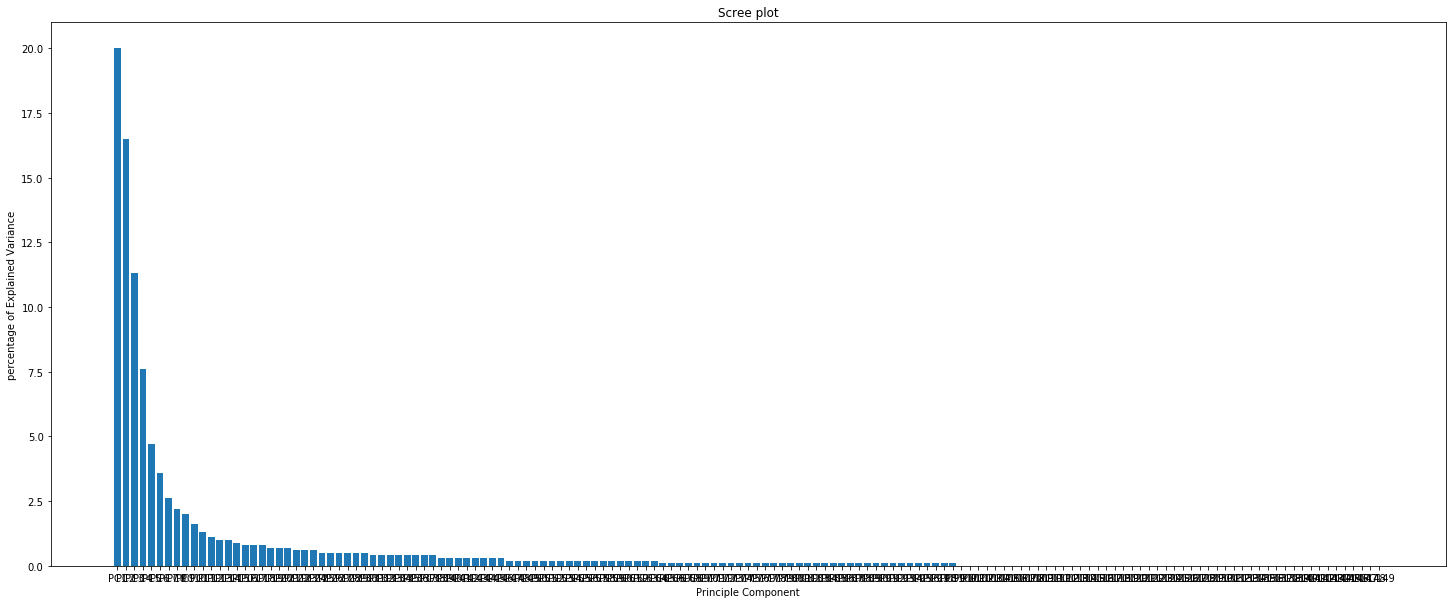

In [189]:
X = reduced_rental.drop(columns=['price'])
y = reduced_rental.price

pca = PCA(random_state= random_seed)
pca.fit(X)
pca.data = pca.transform(X)

#Percentage variance of each pca component stands for
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
#Create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Plot the data
plt.figure(figsize = (25, 10))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree plot')
plt.show()

In [66]:
def select_pc(percen_var, threshold = 90):
    '''
    tells you how many principle components you need to keep to retain threshold % of variance
    percen_var: array of feature variance
    threshold: number between 0 to 100
    '''
    if threshold > 100:
        print("Please enter threshold smaller than 100%")
    
    for i in range(len(percen_var)):
        if sum(percen_var[:i]) >= threshold:
            print('PC1 + PC{} add up to {} % of the variance'.format(i+1, round(sum(percen_var[:i]), 2)))
            break
            
    if sum(percen_var[:-1]) <= threshold:
        print("please enter a lower threshold, max threshold: {}%".format(round(sum(per_var[:-1]),2)))

In [67]:
select_pc(per_var, threshold=95)

PC1 + PC62 add up to 95.0 % of the variance


In [41]:
def get_redundant_pairs(df):
    '''
    Get diagonal and lower triangular pairs of correlation matrix
    '''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_abs_correlations(df, n = 5):
    '''
    get both top5 and final 5 less correlated features
    returns the top n variable names in a list
    '''
    #df = df.drop('ID_code', axis = 1)
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    print("Top {} Absolute Correlations".format(n))
    print(au_corr[0:n])
    print('---' * 16)
    print("Bottom {} Absolute Correlations".format(n))
    print(au_corr[-n:])
    
    var_list = []
    for i in range(n):
        var_list.append(au_corr[0:n].index[i][1])
    
    return var_list

In [104]:
top_list = get_abs_correlations(reduced_rental, 16)

Top 16 Absolute Correlations
Cooktop          HoodFan               1.000000
fridge_ava       stove_ava             0.973191
Dryer            Washer_ava            0.958985
Bars             Cafe                  0.928220
Cafe             Restaurants           0.913403
Bank             GroceryStore          0.910816
Bars             Restaurants           0.890525
Cafe             GroceryStore          0.886171
GroceryStore     Restaurants           0.878907
Bank             Cafe                  0.872788
                 Restaurants           0.858507
Bars             GroceryStore          0.850196
Bank             Bars                  0.849628
AirConditioning  InSuiteLaundry_ava    0.827328
                 DishWasher_ava        0.821802
Dryer            Microwave             0.813667
dtype: float64
------------------------------------------------
Bottom 16 Absolute Correlations
CentralVacuum  stove_ava              NaN
               smoking_ava            NaN
               partyroo

In [181]:
reduced_rental.corr()['price'][:].abs().sort_values(ascending = False)

price                   1.000000
Electricity_ava         0.093927
Backyard                0.076250
Manager_ava             0.071701
Garden                  0.067846
Elevator_ava            0.065282
BuzzerEntry             0.059318
LaundryRoom_ava         0.058285
Security_ava            0.056201
Balcony_ava             0.055373
WallUnit                0.047992
WheelchairAccess        0.047553
Hospital                0.046053
SecureEntry_ava         0.044737
GuestSuite              0.044570
DogPark                 0.044540
PublicLibrary           0.042621
PrivateYard             0.042338
Playground_ava          0.041847
MovieTheater            0.041832
parking_ava             0.041548
PetFriendly             0.040454
Fireplace               0.039991
Daycare                 0.039613
CommunityGarden         0.037767
Highway                 0.036500
Bars                    0.036424
Cafe                    0.035689
RooftopPool_ava         0.035599
WalkinCloset            0.035199
          

In [257]:
pca_reduced_model = run_model(reduced_rental, with_pca=True, num_of_features=90)

Training LightGBM model: 

Training Complete! Used 0.9893553256988525 seconds 

Training Accuracy: 

Mean Squared Error is: 195275.40435504288 

Root Mean Squared Error is: 441.8997673172536 

Mean Absolute Error is: 304.21899928504195 

Testing Accuracy: 

Mean Squared Error is: 579720.0349582144 

Root Mean Squared Error is: 761.3934823455047 

Mean Absolute Error is: 520.6086820868838 



In [258]:
pca_reduced_model_elastic = run_model(reduced_rental, model="Elastic", with_pca=True, num_of_features=90)

Training Elastic Net model: 

Training Complete! Used 0.008970022201538086 seconds 

Training Accuracy: 

Mean Squared Error is: 590023.1723034655 

Root Mean Squared Error is: 768.129658523524 

Mean Absolute Error is: 534.3743741199252 

Testing Accuracy: 

Mean Squared Error is: 663050.587266277 

Root Mean Squared Error is: 814.2791826310415 

Mean Absolute Error is: 566.8490033759366 



## No outlier dataset

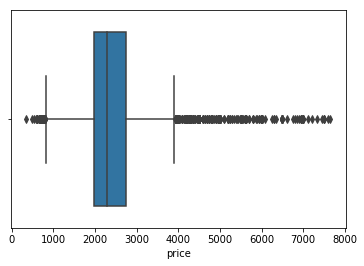

In [68]:
sns.boxplot(x=reduced_rental['price'])

In [91]:
Q1 =  reduced_rental['price'].quantile(0.25)
Q3 = reduced_rental['price'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
print(low, high)
print(Q1, Q3)

825.0 3905.0
1980.0 2750.0


In [98]:
rental_no_outlier = final_rental[(final_rental['price'] <= 2750) & (final_rental['price'] >= 1980) ]
rental_no_outlier = rental_no_outlier.drop_duplicates()

### No PCA

In [99]:
no_outlier_model = run_model(rental_no_outlier)

Training LightGBM model: 

Training Complete! Used 0.35006213188171387 seconds 

Training Accuracy: 

Mean Squared Error is: 22975.269836665433 

Root Mean Squared Error is: 151.57595401865507 

Mean Absolute Error is: 123.33405532198206 

Testing Accuracy: 

Mean Squared Error is: 45080.8939556195 

Root Mean Squared Error is: 212.3226176261481 

Mean Absolute Error is: 173.5993929198939 



In [72]:
no_outlier_model_elastic = run_model(rental_no_outlier, model = "Elastic")

Training Elastic Net model: 

Training Complete! Used 0.03590226173400879 seconds 

Training Accuracy: 

Mean Squared Error is: 299103.95233150723 

Root Mean Squared Error is: 546.9039699357714 

Mean Absolute Error is: 427.54841618115114 

Testing Accuracy: 

Mean Squared Error is: 292943.28741113003 

Root Mean Squared Error is: 541.2423555221174 

Mean Absolute Error is: 426.5869262280711 



### With PCA

In [81]:
pca_no_outlier_model = run_model(rental_no_outlier, with_pca=True, num_of_features=120)

Training LightGBM model: 

Training Complete! Used 1.2246646881103516 seconds 

Training Accuracy: 

Mean Squared Error is: 93224.41501102025 

Root Mean Squared Error is: 305.32673484485474 

Mean Absolute Error is: 232.77079193898658 

Testing Accuracy: 

Mean Squared Error is: 257977.68765892764 

Root Mean Squared Error is: 507.9150398038314 

Mean Absolute Error is: 394.37742769049197 



In [83]:
pca_no_outlier_model_elastic = run_model(rental_no_outlier, model = "Elastic", with_pca=True, num_of_features=50)

Training Elastic Net model: 

Training Complete! Used 0.015626192092895508 seconds 

Training Accuracy: 

Mean Squared Error is: 299660.68978556804 

Root Mean Squared Error is: 547.4127234414341 

Mean Absolute Error is: 427.9151273970787 

Testing Accuracy: 

Mean Squared Error is: 293075.7307179906 

Root Mean Squared Error is: 541.3646928993344 

Mean Absolute Error is: 426.68455688688965 



## Randomly deleting top correlated feature attempt

In [84]:
# Threshold for removing correlated variables
threshold = 0.6

# Absolute value correlation matrix
corr_matrix = reduced_rental.corr().abs()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Remove the columns
reduced_rental = reduced_rental.drop(columns = to_drop)

len(reduced_rental.columns)

109

In [85]:
rental_no_outlier = reduced_rental[(reduced_rental['price'] <= high) & (reduced_rental['price'] >= low) ]
rental_no_outlier = rental_no_outlier.drop_duplicates()

In [88]:
run_model(rental_no_outlier)

Training LightGBM model: 

Training Complete! Used 0.36632704734802246 seconds 

Training Accuracy: 

Mean Squared Error is: 159574.17365210468 

Root Mean Squared Error is: 399.4673624366635 

Mean Absolute Error is: 307.86439528446823 

Testing Accuracy: 

Mean Squared Error is: 264730.1105752564 

Root Mean Squared Error is: 514.5193004885788 

Mean Absolute Error is: 398.43597656450777 



LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       metric='rmse', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbose=1)

## LGB tuning modeling

In [186]:
import lightgbm as lgb

In [229]:
X = reduced_rental.drop(columns=['price'])
y = reduced_rental.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [230]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [231]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [232]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

[1]	valid_0's l1: 180.974	valid_0's l2: 45365.2
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 180.617	valid_0's l2: 45190.2
[3]	valid_0's l1: 180.108	valid_0's l2: 45001.4
[4]	valid_0's l1: 179.835	valid_0's l2: 44874.5
[5]	valid_0's l1: 179.667	valid_0's l2: 44798.4
[6]	valid_0's l1: 179.3	valid_0's l2: 44624.5
[7]	valid_0's l1: 179.102	valid_0's l2: 44550.5
[8]	valid_0's l1: 178.894	valid_0's l2: 44477.2
[9]	valid_0's l1: 178.611	valid_0's l2: 44353.7
[10]	valid_0's l1: 178.431	valid_0's l2: 44314.5
[11]	valid_0's l1: 178.313	valid_0's l2: 44325.9
[12]	valid_0's l1: 177.948	valid_0's l2: 44195.4
[13]	valid_0's l1: 177.608	valid_0's l2: 44076.1
[14]	valid_0's l1: 177.465	valid_0's l2: 44068.9
[15]	valid_0's l1: 177.324	valid_0's l2: 44070.3
[16]	valid_0's l1: 176.979	valid_0's l2: 43940.4
[17]	valid_0's l1: 176.853	valid_0's l2: 43930
[18]	valid_0's l1: 176.817	valid_0's l2: 43929.5
[19]	valid_0's l1: 176.605	valid_0's l2: 43869.9
[20]	valid_0's l1: 17

In [233]:
feature_importance = gbm.feature_importance()

In [234]:
columns = list(reduced_rental.columns[1:])

In [235]:
#Concat features and importance together
feature_importance_df = pd.DataFrame()

feature_importance_df["Feature"] = columns
feature_importance_df["importance"] = gbm.feature_importance()

Text(0.5, 1.0, 'Light GBM Feature Importance (Top 30)')

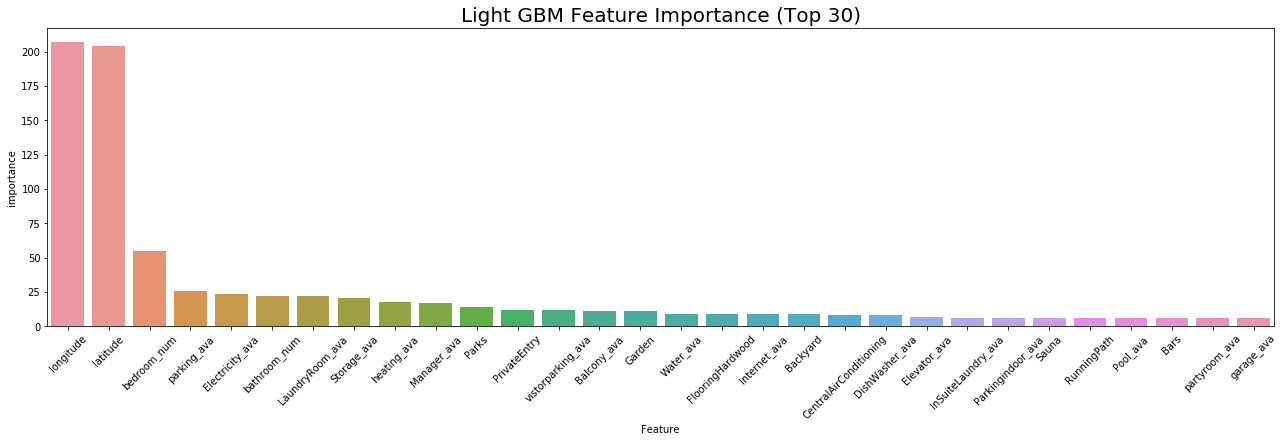

In [236]:
#Plot the feature importance plot
plt.figure(figsize=(18, 6))
sns.barplot(x="Feature", y="importance", data=feature_importance_df.sort_values(by="importance", ascending=False)[:30])
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Light GBM Feature Importance (Top 30)", fontsize=20)